In [1]:
import sys
from time import time
from prep_terrain_data import makeTerrainData ## dataset
from class_vis import prettyPicture ## Visualization
sys.path.append("../tools/")

from sklearn import ensemble
from sklearn.metrics import accuracy_score

In [5]:
X_train, y_train, X_test, y_test=makeTerrainData()

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [6]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   35.5s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [7]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1200}

In [98]:
def rf_accuracy(X_train, y_train, X_test, y_test):
    t0=time()
    clf=ensemble.RandomForestClassifier(min_samples_leaf=4, min_samples_split=4, n_estimators=10, criterion='entropy')
    clf.fit(X_train,y_train)
    print "training time:", round(time()-t0, 3), "s"
    t0=time()
    pred=clf.predict(X_test)
    print "prediction time:", round(time()-t0, 3), "s"
    score=accuracy_score(y_test,pred)
    print score
    return pred, clf

In [19]:
## accuracy is 0.924 not high enough with default parameters
pred, clf=rf_accuracy(X_train, y_train, X_test, y_test)

training time: 0.076 s
prediction time: 0.006 s
0.924


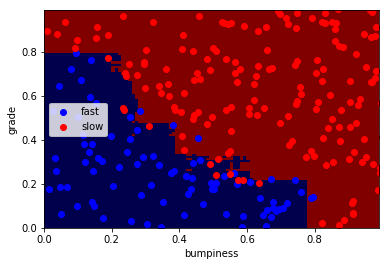

In [20]:
## overfitting can be seen at some places
prettyPicture(clf, X_test, y_test)

training time: 0.028 s
prediction time: 0.007 s
0.932


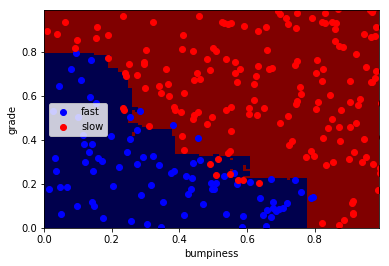

In [22]:
# change criterion to entropy improves accuracy by 0.008 and still a bit overfitting
pred, clf=rf_accuracy(X_train, y_train, X_test, y_test)
prettyPicture(clf, X_test, y_test)

training time: 0.037 s
prediction time: 0.004 s
0.936


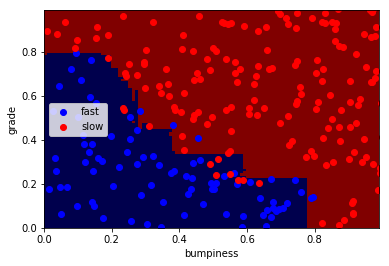

In [115]:
# by using min_samples_leaf=4, min_samples_split=4 the maximal accuracy can reach is 0.936
pred, clf=rf_accuracy(X_train, y_train, X_test, y_test)
prettyPicture(clf, X_test, y_test)